In [ ]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn.preprocessing

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss

In [ ]:
df= pd.read_csv('half_dataset2.csv')
df.set_index('song_index',drop=True)

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country,artist_name,song_title,audio_feature_1,audio_feature_2,audio_feature_3,audio_feature_4,audio_feature_5,audio_feature_6,audio_feature_7,audio_feature_8,audio_feature_9,audio_feature_10,audio_feature_11,audio_feature_12,audio_feature_13,audio_feature_14,audio_feature_15,audio_feature_16,audio_feature_17,...,usage_feature_89,usage_feature_90,usage_feature_91,usage_feature_92,usage_feature_93,usage_feature_94,usage_feature_95,usage_feature_96,usage_feature_97,usage_feature_98,usage_feature_99,usage_feature_100,usage_feature_101,usage_feature_102,usage_feature_103,usage_feature_104,usage_feature_105,usage_feature_106,usage_feature_107,usage_feature_108,usage_feature_109,usage_feature_110,usage_feature_111,usage_feature_112,usage_feature_113,usage_feature_114,usage_feature_115,usage_feature_116,usage_feature_117,usage_feature_118,usage_feature_119,usage_feature_120,usage_feature_121,usage_feature_122,usage_feature_123,usage_feature_124,usage_feature_125,usage_feature_126,usage_feature_127,usage_feature_128
song_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12321,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,The Velvet Underground,Candy Says,0.166151,-0.273484,-0.288277,0.014433,-0.548967,-0.034535,-0.474400,1.042967,0.102165,0.442934,-0.175799,0.408833,-0.390949,0.556825,-0.356156,-0.124065,0.002201,...,0.263718,0.113181,0.006843,-0.110559,-0.113196,-0.214300,0.042904,0.028908,-0.102527,-0.085730,-0.124163,-0.087009,0.018589,0.028793,-0.169945,0.020311,-0.125434,0.023183,0.036077,-0.122274,0.005369,-0.056787,0.102893,0.096064,0.119704,-0.001103,0.082905,0.006450,0.179152,-0.021911,0.079119,0.150357,0.047379,0.065349,0.042145,0.069095,-0.030227,-0.022169,-0.037699,-0.038157
43817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,SL,Felt Tips,-0.216838,0.462764,-0.165409,0.694041,-0.528228,-0.364919,-0.169310,1.521927,-0.004998,0.850131,-0.027328,0.596800,-0.382264,-0.333304,-0.341408,-0.058416,-0.599700,...,-0.021415,0.042848,0.018730,-0.020473,0.010609,0.030271,-0.006358,0.012910,-0.005329,-0.022663,-0.007015,-0.010660,-0.006744,-0.018975,-0.000086,-0.007626,-0.022533,0.022338,-0.025279,0.019627,0.016607,0.009159,0.004838,-0.001648,0.017596,-0.011213,-0.006666,-0.003778,0.020338,0.019794,-0.007148,0.004524,-0.009512,-0.002046,-0.009497,0.017599,-0.019274,-0.020923,-0.001674,-0.006671
28777,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,OneRepublic,Truth To Power,0.112029,-0.096323,0.111307,-0.006368,-0.351543,-0.328992,-0.416055,0.135240,0.009256,-0.026228,-0.131654,0.266782,-0.258261,0.617147,-0.311161,-0.198933,-0.527742,...,0.143495,0.036462,0.200070,-0.156441,-0.038395,-0.194982,-0.031132,-0.088853,0.062841,0.115074,-0.087835,0.047447,-0.014987,0.025329,-0.262866,-0.051941,-0.183558,-0.030195,0.078591,0.041718,-0.031225,-0.125886,-0.006877,-0.052689,-0.139013,0.009030,-0.009348,0.050699,-0.015538,-0.024821,-0.041490,-0.007032,-0.182706,-0.049043,-0.039776,-0.147642,-0.093688,-0.012962,0.058286,-0.083554
47004,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Loony,royal flush,-0.107093,-0.025861,0.286685,0.648647,-0.272894,-0.224029,-0.202615,1.430805,0.134436,0.629127,0.184874,1.016813,-0.316063,-0.201018,-0.230518,-0.148241,-0.372369,...,0.045599,0.047058,-0.155641,0.213833,-0.078549,0.015992,0.037934,-0.028010,-0.125138,-0.028278,0.198033,0.221372,-0.149873,-0.070022,0.074571,-0.124554,0.145700,0.105272,-0.073104,-0.107401,-0.045525,0.010631,0.052947,0.034557,-0.183732,-0.059000,0.047461,-0.010704,-0.187576,0.056538,-0.019418,-0.091927,-0.077711,0.039287,-0.034731,0.006404,-0.077088,0.085723,-0.006259,0.127711
17466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Laurent Garnier,It's Just Muzik,-0.213499,-0.261455,-0.132941,-0.179343,-0.689800,-0.364857,-0.195284,1.256816,-0.161421,0.496767,-0.054385,0.831049,-0.368862,-0.186775,-0.420244,0.072608,-0.510372,...,-0.102032,-

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
l=list(df.columns[0:22]) #représente la liste des labels + index
x=list(df.columns[22:]) #liste des variables explicatives

l.remove('song_index') #on retire l'index
x.remove('artist_name') #on retire les strings ici, on exploitera sur une autre méthode
x.remove('song_title')


***1ère méthode: Attribuer le genre le plus représenté: le rock***




In [ ]:
df_naif=pd.DataFrame(columns=l)
n=df.shape[0]
for label in l: 
  if label!='rock':
    df_naif[label]=np.zeros(n, dtype=int)
  else:
    df_naif[label]=np.zeros(n, dtype=int)+1
df_naif

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25276,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25277,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25278,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25279,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred=df_naif.values
y_true=df[l].values

In [ ]:
accuracy_score(y_true,y_pred)

0.10881689806574107

In [ ]:
precision_score(y_true,y_pred,average='micro')

0.16186068589058977

In [ ]:
recall_score(y_true,y_pred,average='micro')

0.7578485428153483

In [ ]:
hamming_loss(y_true,y_pred) #ici on a un loss donc il faut faire 1-loss? 


0.088266927355571

In [ ]:
from sklearn.metrics import zero_one_loss
#trouvé sur la doc sklearn: donne le pourcentage de subset non correctement prédits 
#dans cet exemple =1-accuracy, est ce toujours le cas? 
zero_one_loss(y_true,y_pred)

0.8911831019342589

***2ème méthode: L régressions logistiques unilabel.***

In [ ]:
X=df[x].values
Y=df[l]
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
for label in l:
  X_train,X_test,Y_train,Y_test= train_test_split(X,Y[label],test_size=0.3, random_state=1)
  logreg=LogisticRegression(max_iter=10000)
  logreg.fit(X_train,Y_train)
  print(label)
  y_hat= logreg.predict(X_test)
  df_hat[label] = y_hat
  df_test[label]=Y_test


asian
rnb
reggae
blues
pop
dance
folk
arabic-music
indie
rock
soulfunk
latin
classical
k-pop
brazilian
metal
rap
jazz
electronic
african
country


In [ ]:
df_test.head()

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
21920,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_true=df_test.values
y_pred=df_hat.values

Exact Ratio Match = Accuracy

In [ ]:

accuracy_score(y_true,y_pred)

0.6891232696110745

Precison 'micro': 
- Calculate metrics globally by counting the total true positives, false negatives and false positives.
 $$precision_{micro}= \frac{TP_1+...TP_L}{TP_1+FP_1+...+TP_L+FP_L}$$ 
 Cela signifie que l'on veut traiter toutes les prédictions de manière égale -> c'est sous jacent que les classes sont considérées équilibrées ? 



In [ ]:
precision_score(y_true,y_pred,average='micro')

0.8653475523577027

Precision 'macro'
- Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
$$ precision_{macro}= \frac{1}{n} \sum_{l=1}^{L} precision_{label_l}$$ où $precision_{label_l}=\frac{TP_l}{TP_l+ FP_l}$
\
c'est la moyenne empirique des précisions pour chaque label, on donsière que tous les labels ont le même poids. \
- Ici clairement pas le cas, cette métrique ne sera donc pas utilisée



In [ ]:
precision_score(y_true,y_pred,average='macro')

0.8832020562883558

Precision 'weighted': 
- On fait la moyenne pondéré des precisions pour chaque label. 

In [ ]:
precision_score(y_true,y_pred,average='weighted')

0.86119839283671

Recall : $$ \frac{TP}{TP+FN} $$
- même principe:
- il y'a une option en plus: sample: Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from. (pas compris)

In [ ]:
recall_score(y_true,y_pred,average='micro')

0.7578485428153483

In [ ]:
recall_score(y_true,y_pred,average='weighted')

0.7578485428153483

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
conf=multilabel_confusion_matrix(y_true,y_pred)
conf[0]

array([[7503,    0],
       [  25,   57]])

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Confusion matrix, without normalization
[[7503    0]
 [  25   57]]


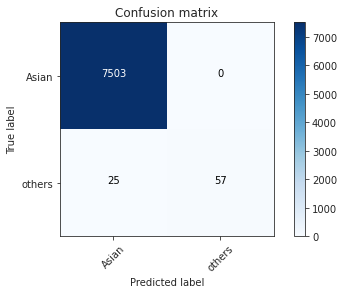

In [ ]:
plot_confusion_matrix(conf[0], classes= ['Asian','others'])